In [48]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

In [26]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\datasets\Salary_Data.xlsx")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [27]:
columns_to_drop=['Gender','Education Level','Job Title']
df=df.drop(columns=columns_to_drop)
df.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [28]:
df.isnull().sum()

Age                    2
Years of Experience    2
Salary                 2
dtype: int64

Train test split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Salary']),df['Salary'],test_size=0.2,random_state=42)

Dealing with nan values

In [ ]:
imputer = SimpleImputer(strategy='median')
x_train = imputer.fit_transform(x_train)
x_test  = imputer.transform(x_test)


In [ ]:
#np.isnan(X_train).sum()

Plotting relationship between categories

C:\Users\Dell\AppData\Local\Temp\ipykernel_9312\189055688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

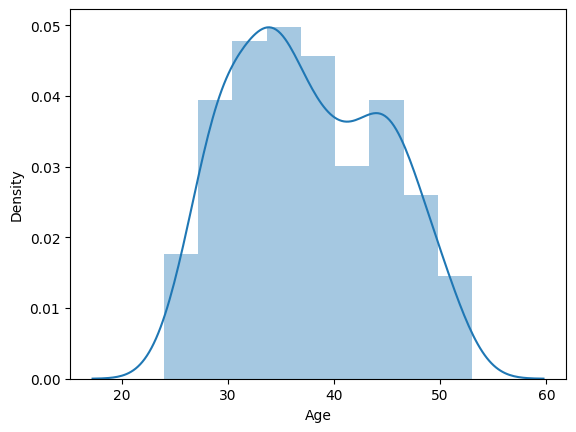

In [40]:
sns.distplot(x_train['Age'])

((array([-2.83270147, -2.5363011 , -2.36847471, -2.24887944, -2.15478411,
         -2.07661294, -2.00938931, -1.95018201, -1.89711324, -1.84890481,
         -1.80464581, -1.76366326, -1.72544529, -1.68959313, -1.65578984,
         -1.62377915, -1.5933508 , -1.56433003, -1.53656998, -1.50994596,
         -1.48435118, -1.45969344, -1.43589258, -1.41287842, -1.39058917,
         -1.36897015, -1.34797267, -1.32755325, -1.30767283, -1.28829622,
         -1.26939159, -1.25093005, -1.23288529, -1.21523328, -1.19795202,
         -1.1810213 , -1.16442252, -1.1481385 , -1.13215338, -1.11645243,
         -1.10102199, -1.08584934, -1.07092263, -1.0562308 , -1.04176348,
         -1.02751099, -1.01346422, -0.99961462, -0.98595415, -0.97247524,
         -0.95917073, -0.94603388, -0.93305829, -0.92023793, -0.90756706,
         -0.89504026, -0.88265235, -0.87039844, -0.85827385, -0.84627414,
         -0.83439507, -0.82263259, -0.81098284, -0.79944213, -0.78800692,
         -0.77667384, -0.76543965, -0.

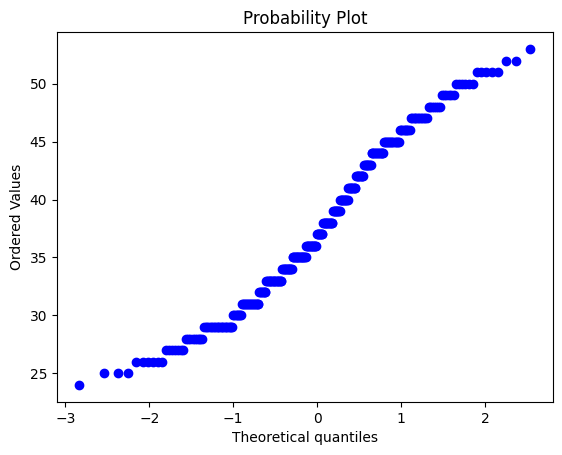

In [47]:
stats.probplot(x_train['Age'],dist='norm',plot=plt)

In [49]:
trf=FunctionTransformer(func=np.log1p)